# Mushroom Classification

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the mushroom dataset
mushroom_data = pd.read_csv('mushrooms.csv')
mushroom_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
mushroom_data.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [4]:
# Exploratory Data Analysis(EDA)
print("Dataset Shape: ", mushroom_data.shape)

Dataset Shape:  (8124, 23)


In [5]:
mushroom_data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [6]:
mushroom_data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
# Checking for unique values in each feature
for col in mushroom_data.columns:
    unique_values = mushroom_data[col].unique()
    print(f"\n{col}: {unique_values}")


class: ['p' 'e']

cap-shape: ['x' 'b' 's' 'f' 'k' 'c']

cap-surface: ['s' 'y' 'f' 'g']

cap-color: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']

bruises: ['t' 'f']

odor: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']

gill-attachment: ['f' 'a']

gill-spacing: ['c' 'w']

gill-size: ['n' 'b']

gill-color: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']

stalk-shape: ['e' 't']

stalk-root: ['e' 'c' 'b' 'r' '?']

stalk-surface-above-ring: ['s' 'f' 'k' 'y']

stalk-surface-below-ring: ['s' 'f' 'y' 'k']

stalk-color-above-ring: ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']

stalk-color-below-ring: ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']

veil-type: ['p']

veil-color: ['w' 'n' 'o' 'y']

ring-number: ['o' 't' 'n']

ring-type: ['p' 'e' 'l' 'f' 'n']

spore-print-color: ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']

population: ['s' 'n' 'a' 'v' 'y' 'c']

habitat: ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [8]:
# Count the number of edible and poisonous mushrooms
print(mushroom_data["class"].value_counts())

e    4208
p    3916
Name: class, dtype: int64


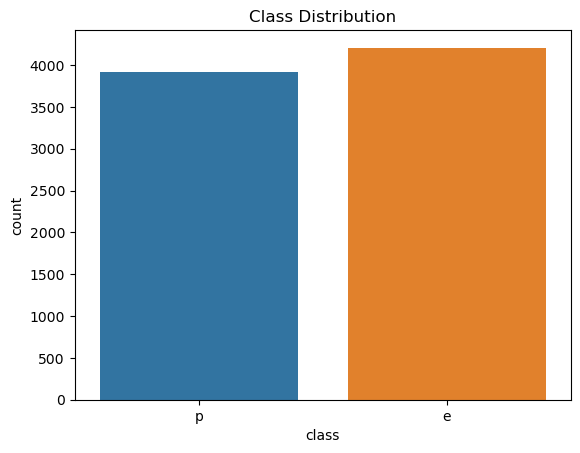

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

#Check the class distribution
sns.countplot(x='class', data=mushroom_data)
plt.title('Class Distribution')
plt.show()

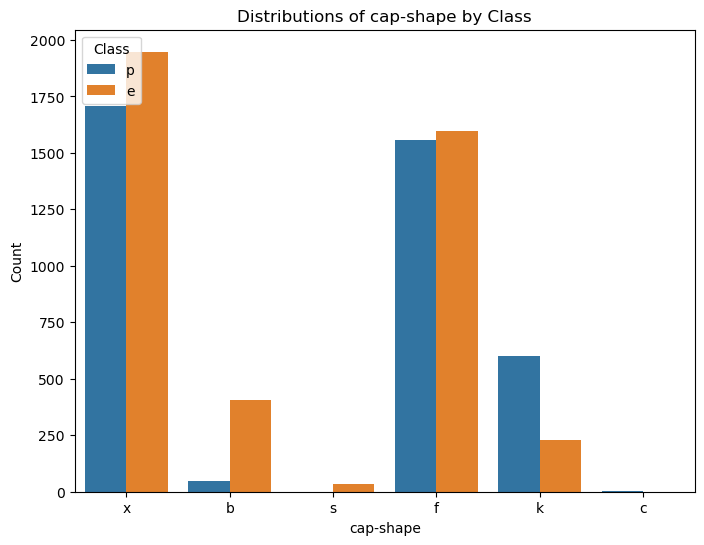

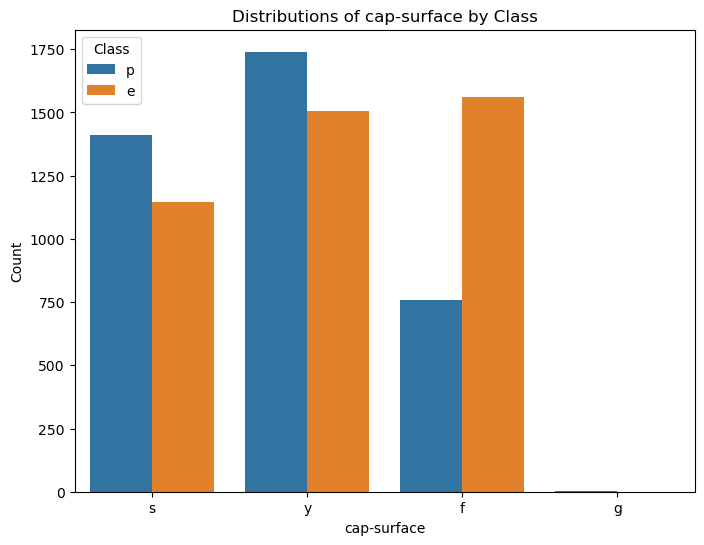

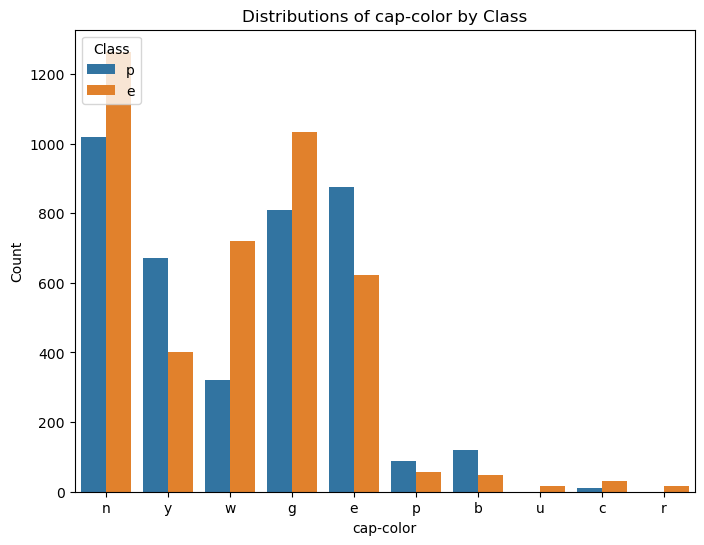

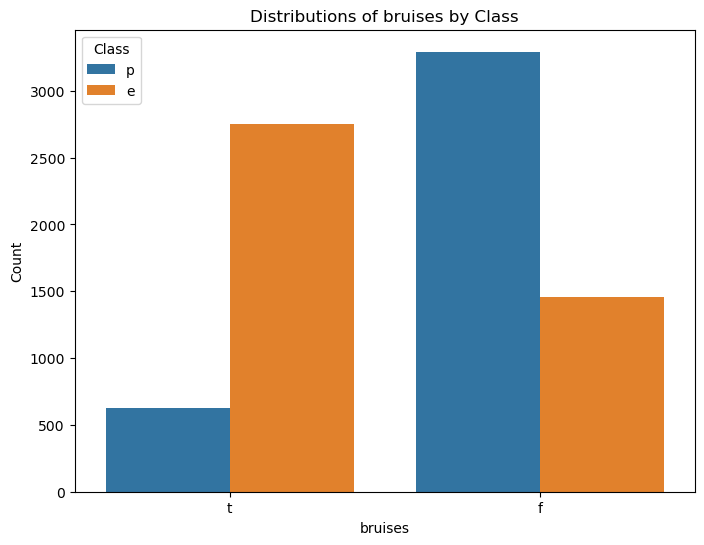

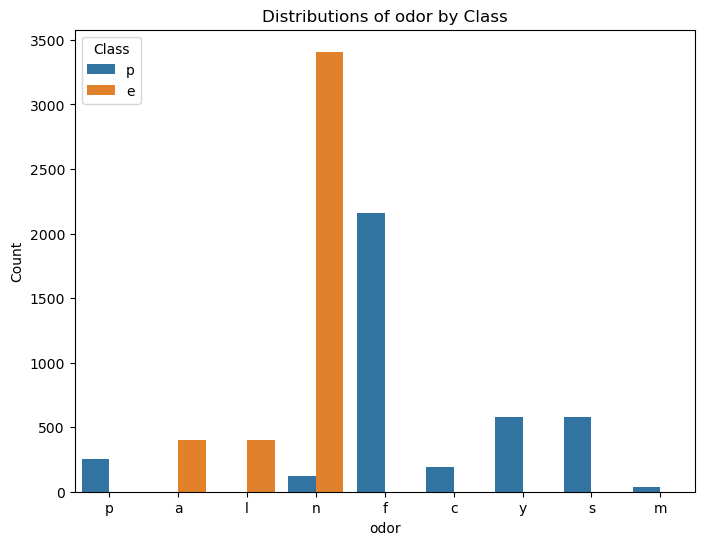

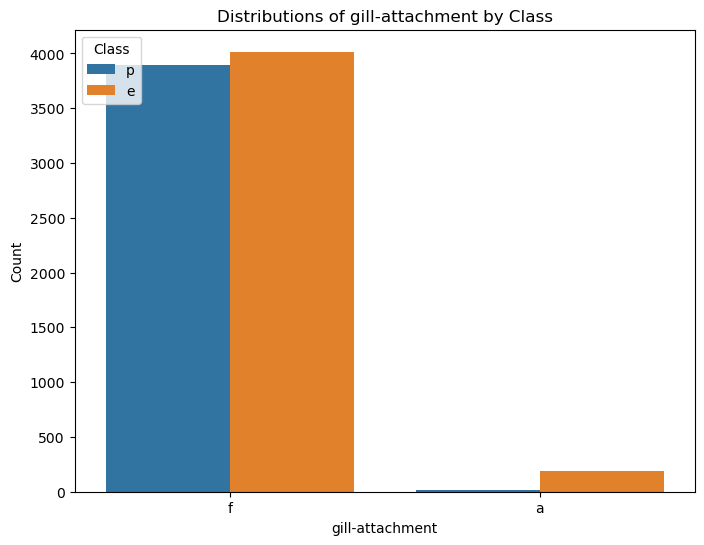

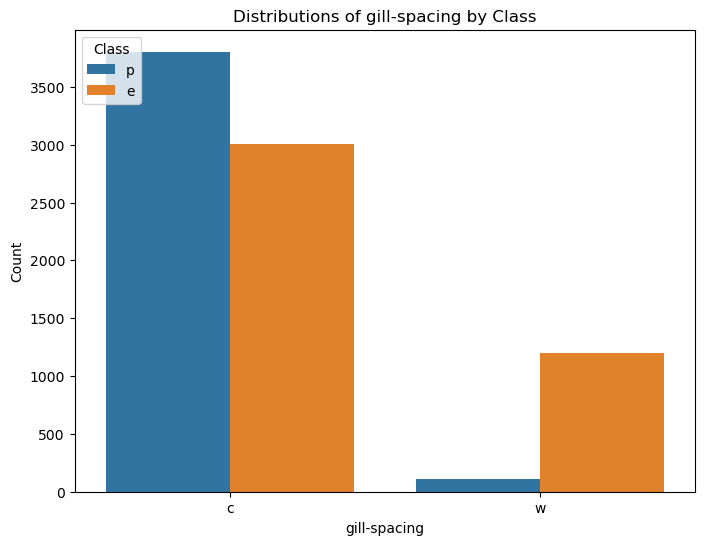

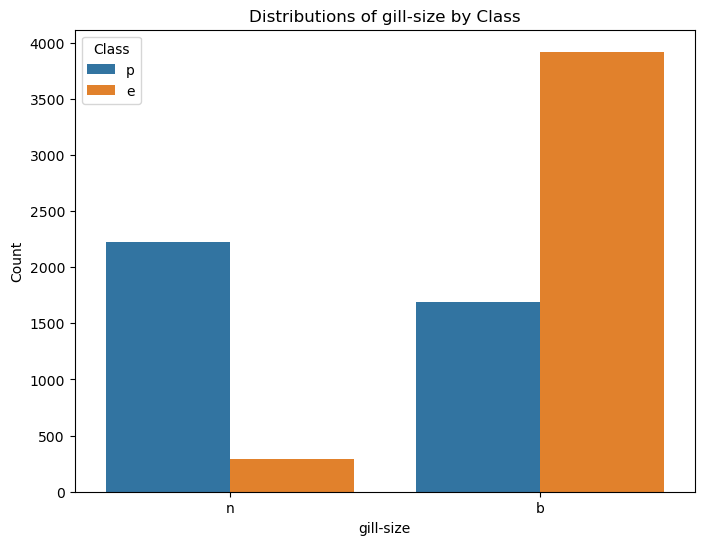

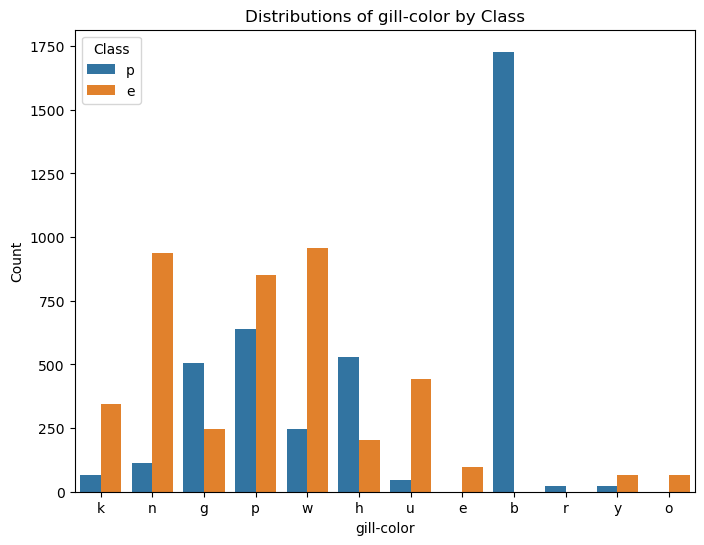

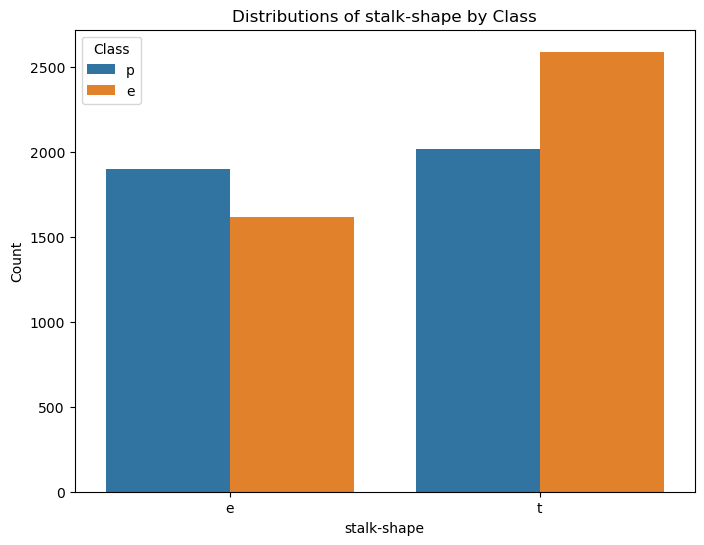

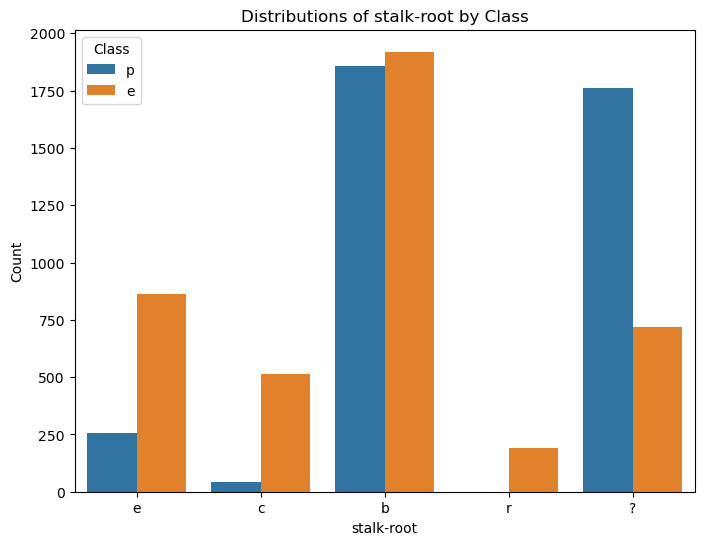

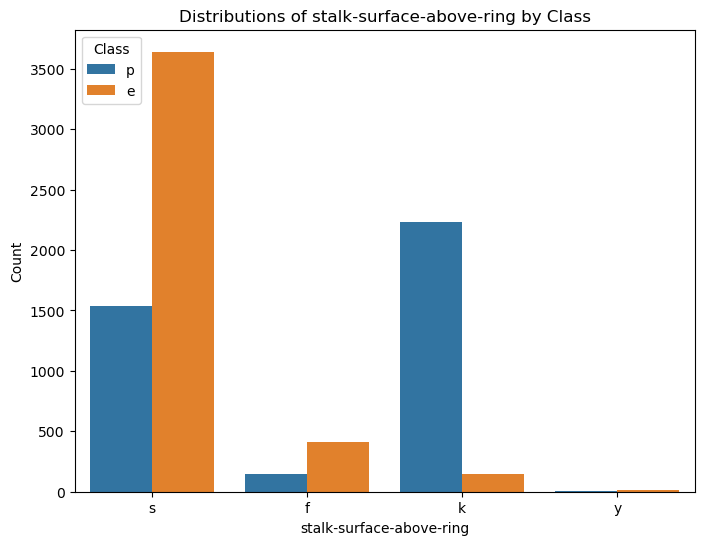

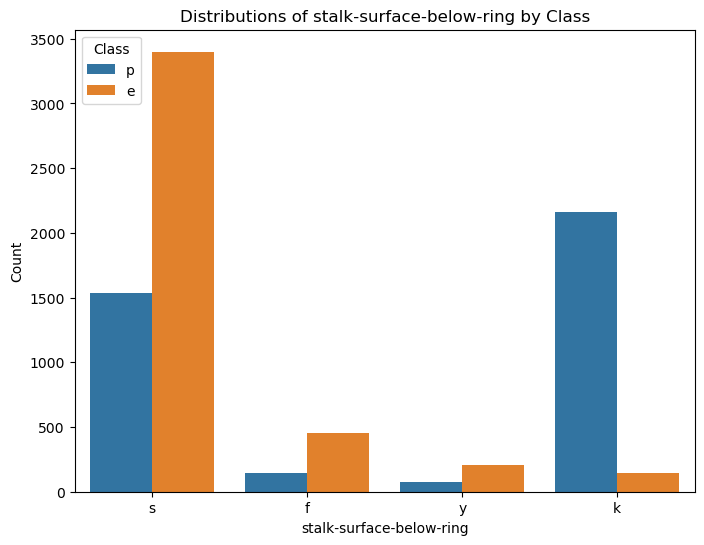

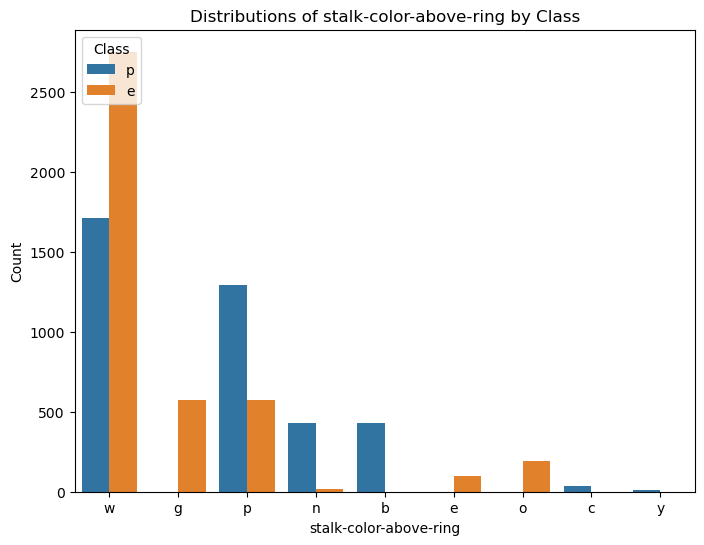

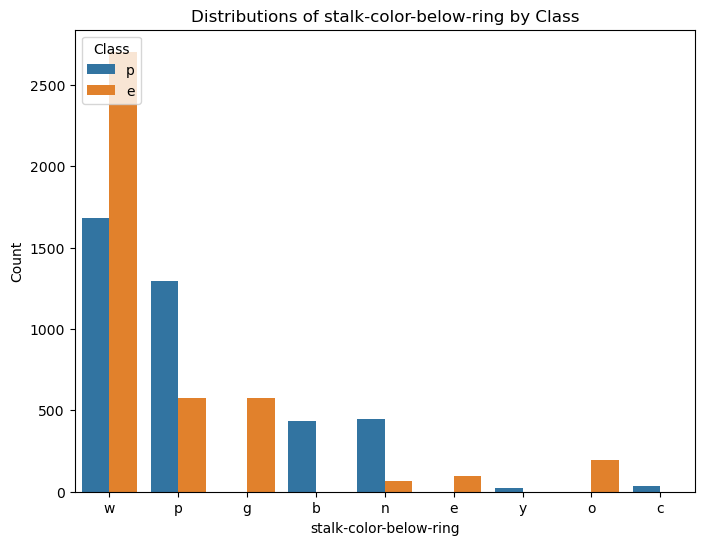

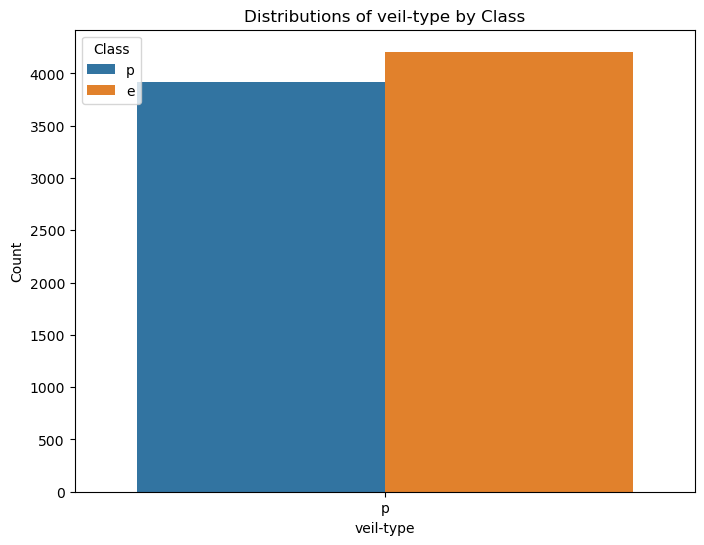

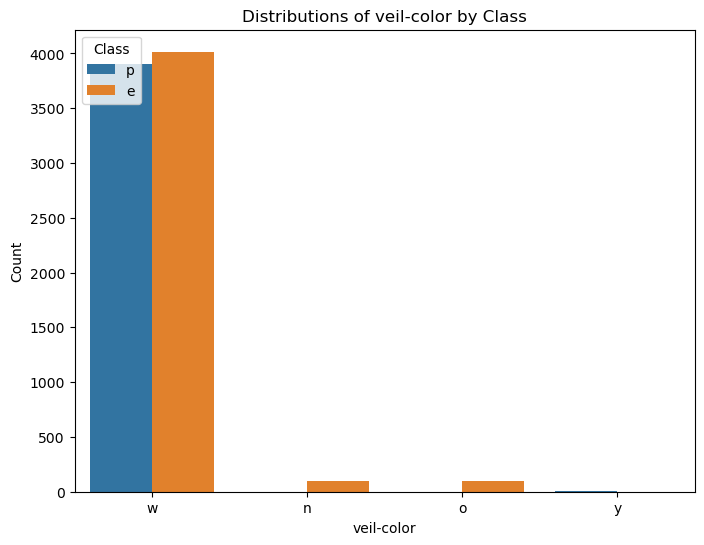

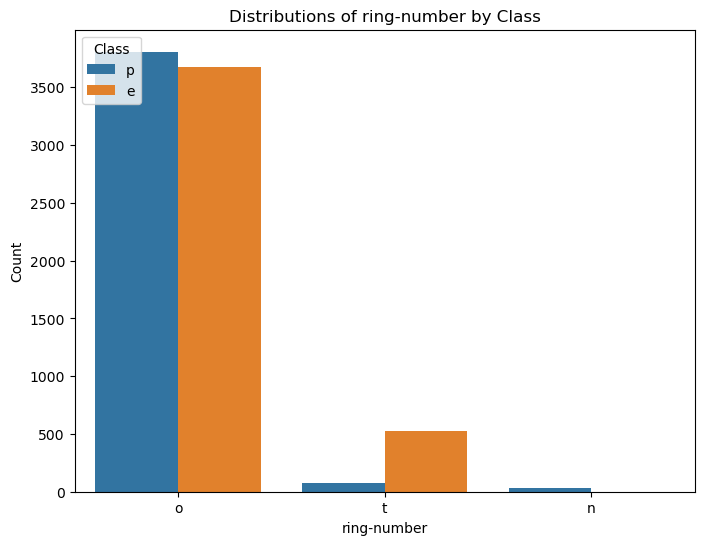

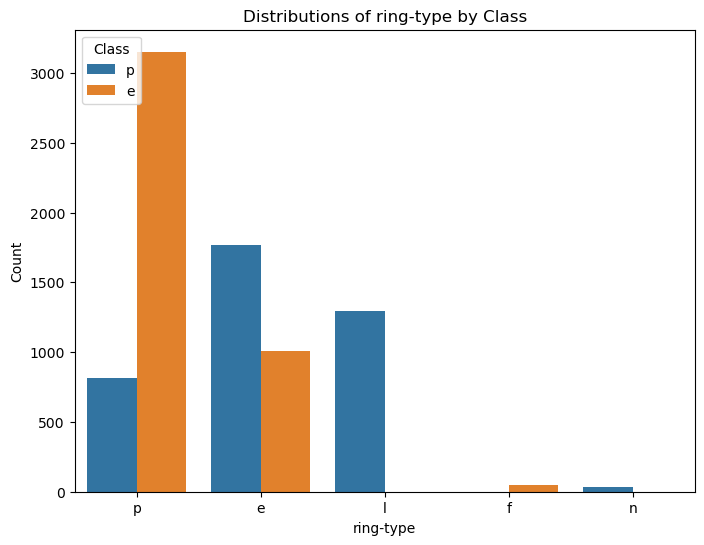

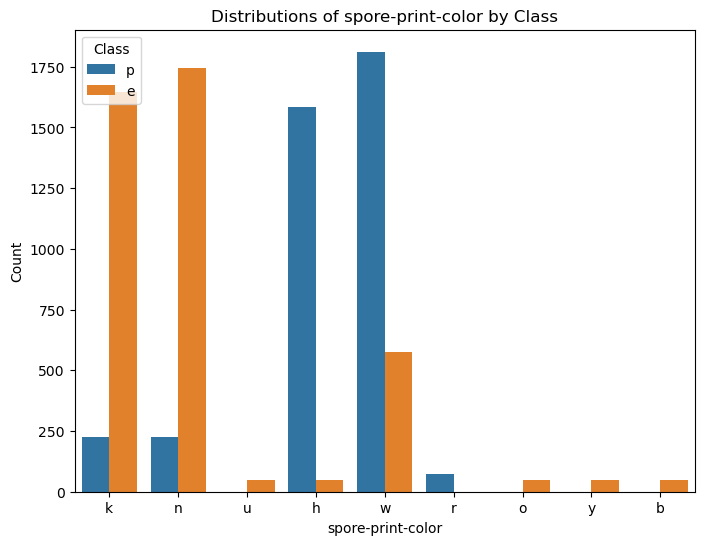

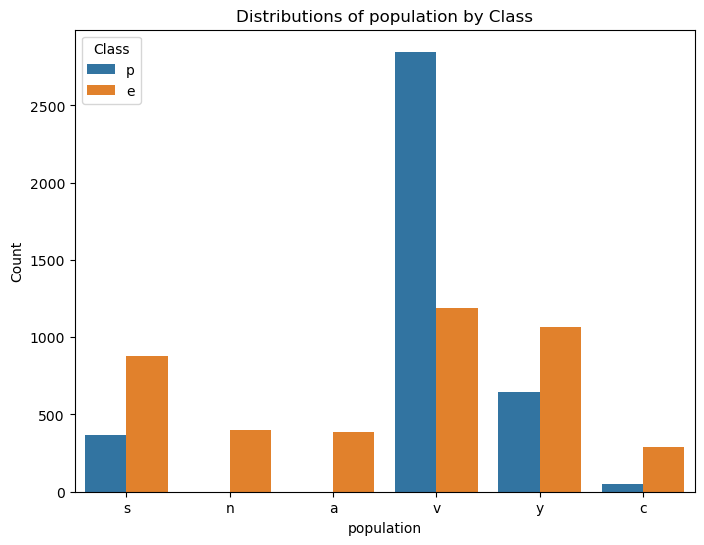

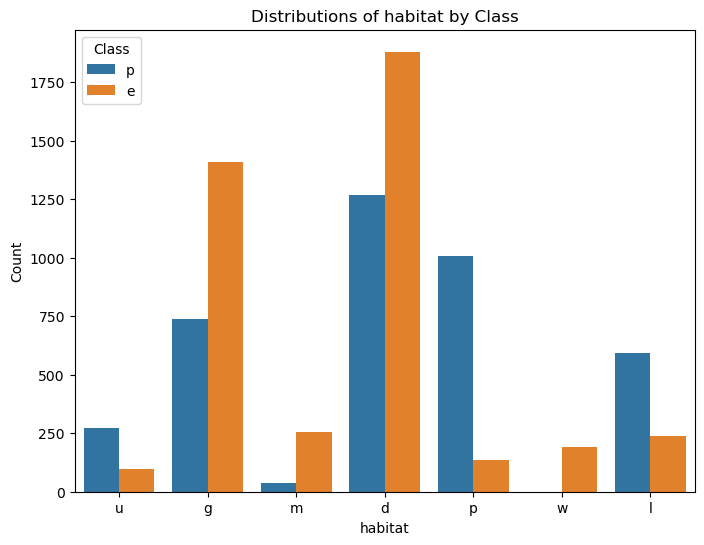

In [10]:
# Visualize categorical features
categorical_col = mushroom_data.columns.drop('class')
for col in categorical_col:
    plt.figure(figsize=(8,6))
    sns.countplot(x=col, data=mushroom_data, hue='class')
    plt.title(f'Distributions of {col} by Class')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Class', loc='upper left')
    plt.show()

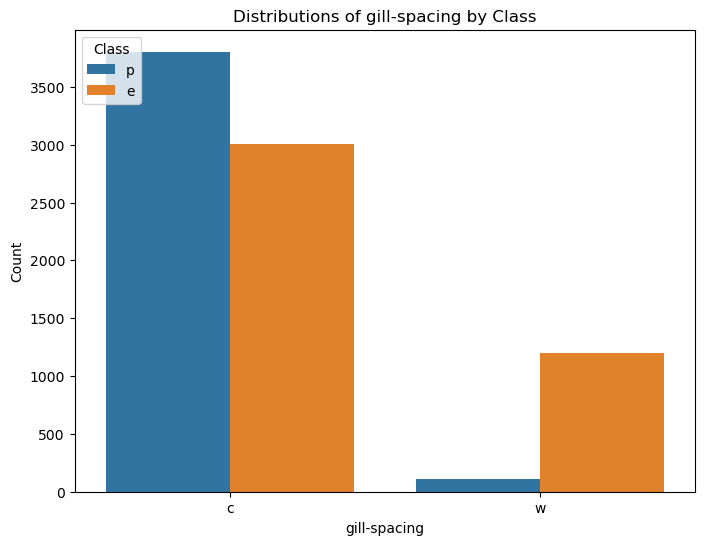

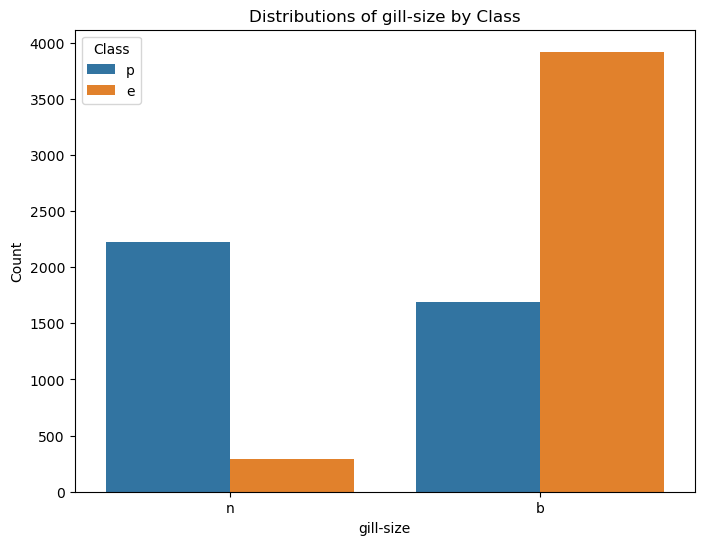

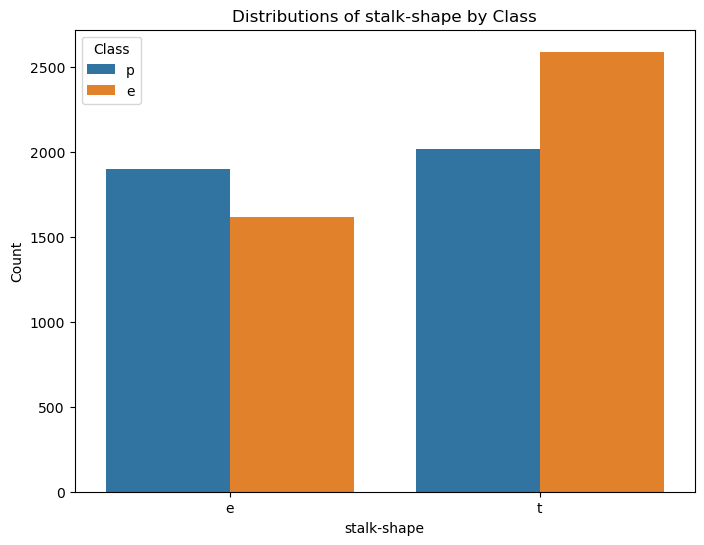

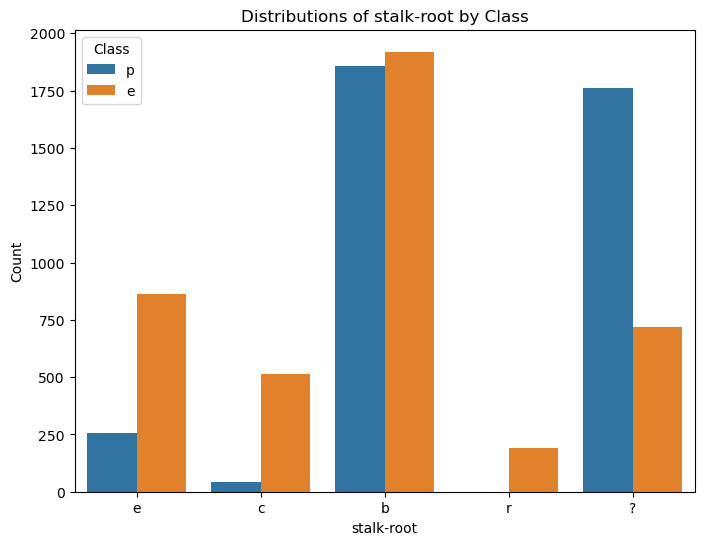

In [11]:
# Visualize numerical features
numerical_cols = ['gill-spacing', 'gill-size', 'stalk-shape', 'stalk-root']
for col in numerical_cols:
    plt.figure(figsize=(8,6))
    sns.countplot(x=col, data=mushroom_data, hue='class')
    plt.title(f'Distributions of {col} by Class')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Class', loc='upper left')
    plt.show()

# Data Preprocessing

In [12]:
# Convert categorical variables into numerical values
label_encoder = LabelEncoder()
for col in mushroom_data.columns:
    mushroom_data[col] = label_encoder.fit_transform(mushroom_data[col])

# Data Splitting 

In [13]:
# Split the data into features (x) and target (y) variables
X = mushroom_data.drop('class', axis=1)
y = mushroom_data['class']

In [14]:
# Split the data into training & testing test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [16]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int32

# Feature Engineering

In [17]:
# Model training and evaluation
# Define a function to evaluate the model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    print("Train Accuracy: ", accuracy_score(y_train, y_pred_train))
    print("Test Accuracy: ", accuracy_score(y_test, y_pred_test))
    print("Confusion Matrix: ")
    print(confusion_matrix(y_test, y_pred_test))
    print("Classification Report: ")
    print(classification_report(y_test, y_pred_test))


# Naive Bayes Classifier
print("Naive Bayes Classifier: ")
naive_bayes = MultinomialNB()
evaluate_model(naive_bayes, X_train, X_test, y_train, y_test)

# Decision Tree Classifier
print("------------------------------------------------------------------------------------------ ")
print("Decision Tree Classifier: ")
decision_tree = DecisionTreeClassifier(random_state=42)
evaluate_model(decision_tree, X_train, X_test, y_train, y_test)

# Support Vector Machine (SVM) Classifier
print("------------------------------------------------------------------------------------------ ")
print("Support Vector Machine (SVM) Classifier: ")
svm = SVC(random_state=42)
evaluate_model(svm, X_train, X_test, y_train, y_test)

# Random Forest Classifier
print("------------------------------------------------------------------------------------------ ")
print("Random Forest Classifier: ")
random_forest = RandomForestClassifier(random_state=42)
evaluate_model(random_forest, X_train, X_test, y_train, y_test)

# Logistic Regression Classifier
print("------------------------------------------------------------------------------------------ ")
print("Logistic Regression Classifier: ")
logistic_regression = LogisticRegression(random_state=42)
evaluate_model(logistic_regression, X_train, X_test, y_train, y_test)

Naive Bayes Classifier: 
Train Accuracy:  0.8052008001230958
Test Accuracy:  0.8073846153846154
Confusion Matrix: 
[[792  51]
 [262 520]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.75      0.94      0.84       843
           1       0.91      0.66      0.77       782

    accuracy                           0.81      1625
   macro avg       0.83      0.80      0.80      1625
weighted avg       0.83      0.81      0.80      1625

------------------------------------------------------------------------------------------ 
Decision Tree Classifier: 
Train Accuracy:  1.0
Test Accuracy:  1.0
Confusion Matrix: 
[[843   0]
 [  0 782]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg 

In [18]:
# Checking is there any overfitting by doing a grid searchCV
param_grid = {'n_estimators' : [50, 100, 200],
             'max_depth' : [None, 10, 20, 30],
             'min_samples_split' : [2, 5, 10],
             'min_samples_leaf' : [1, 2, 4]}
random_forest = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(random_forest, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_random_forest = grid_search.best_estimator_

# Evaluate the best Random Forest model
evaluate_model(best_random_forest, X_train, X_test, y_train, y_test)

Train Accuracy:  1.0
Test Accuracy:  1.0
Confusion Matrix: 
[[843   0]
 [  0 782]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [22]:
import joblib

In [23]:
joblib.dump(grid_search,'model.joblib')

['model.joblib']